In [49]:
import numpy as np
import pandas as pd
import lambda_dynamics_ToyModel as ld
from importlib import reload
reload(ld)
import DynaMETE_Rfunctions_ToyModel as rf
import matplotlib.pyplot as plt
import brute_force_ToyModel as bf
reload(bf)
%matplotlib inline

In [50]:
# Set up unperturbed parameters

# state variables
s = pd.Series(np.array([50, 1000]), index=['S','N']) #'S' = array.item(0), 'N' is array.item(1)

# parameters. We will derive the precise ones below
#D0 is D1 in the Apendix doc. D0 is hardcoded into R functions.
p_d = np.array([0.059,0.02, s['N'], s['S']]) #s['N'] gives us array.item(1) (array is the first argument to pd.Series)
p = pd.Series(p_d,index=['b0','d0','Nc', 'Sc']) #to assign the birth rate, unperturbed death rate, and carrying capacity

# To get precise parameters
pp = ld.get_ss_params(s,p)

# Initial lambdas
li = rf.lambda_i(s)
# Display parameters and show derivatives are close enough to zero. (-900/2.5*10^5 is still small)
print("Non exact parameters")
display(p)
display(rf.get_dXdt(li,s,p))
print("Exact parameters")
display(pp)
display(rf.get_dXdt(li,s,pp))

Non exact parameters


b0       0.059
d0       0.020
Nc    1000.000
Sc      50.000
dtype: float64

dS    0.000000e+00
dN   -2.216912e-15
dtype: float64

Exact parameters


b0       0.059
d0       0.020
Nc    1000.000
Sc      50.000
dtype: float64

dS    0.000000e+00
dN    1.582361e-15
dtype: float64

In [142]:
import brute_force_ToyModel as bf
reload(bf)
import brute_force_ToyModel as bf
import DynaMETE_Rfunctions_ToyModel as rf
reload(rf)
import DynaMETE_Rfunctions_ToyModel as rf
import lambda_dynamics_ToyModel as ld
from importlib import reload
reload(ld)



def BruteForce(l, s, p, time, dt=0.015):
    ret = []
    lam = []
    ds = np.array([])
    counter = 0
    c = 0
    p['d0'] = l[0]
    prev_d = l[0]
    counter = 0
    for i in l:
        d_d = prev_d - i
        prev_d = i
        if(len(ret) > 0):
            print(ret[-1])
        for j in range(1):
            p['d0'] = i
            if(counter > 0):
                l_d0,s_d0,ds_d0 = bf.iterate(time[c],s,p,i-l[counter-1], dt=dt, verbose = False, l0 = last_lambda, ds0 = last_d0)
            else:
                l_d0,s_d0,ds_d0 = bf.iterate(time[c],s,p,0, dt=dt, verbose = False)
            s = s_d0.iloc[-1]
            ret += list(s_d0['N'][1:])
      
            lam += list(l_d0[1:])
            last_lambda = l_d0[-1]

            last_d0 = ds_d0.iloc[-1]
            ds = np.append(ds, np.array(ds_d0['dN'][1:]))
            counter += 1
        c += 1
    
    
    
    return ret,lam, ds
        

In [143]:
def Lambda(l, s, p, time, dt=0.015):
    ret = []
    lam = []
    ds = np.array([])
    counter = 0
    c = 0
    p['d0'] = l[0]
    prev_d = l[0]
    counter = 0
    for i in l:
        d_d = prev_d - i
        prev_d = i
        if(len(ret) > 0):
            print(ret[-1])
        for j in range(1):
            p['d0'] = i
            if(counter > 0):
                l_d0,s_d0,ds_d0 = ld.iterate(time[c],s,p, dt, d_d = i-l[c-1], verbose = False, l = last_lambda, ds = last_d0)
            else:
                l_d0,s_d0,ds_d0 = ld.iterate(time[c],s,p, dt, verbose = False)
            s = s_d0.iloc[-1]
            ret += list(s_d0['N'][1:])
      
            lam += list(l_d0[1:])
            last_lambda = l_d0[-1]

            last_d0 = ds_d0.iloc[-1]
            ds = np.append(ds, np.array(ds_d0['dN'][1:]))
            counter += 1
        c += 1
    
    
    
    return ret,lam, ds

1000.0


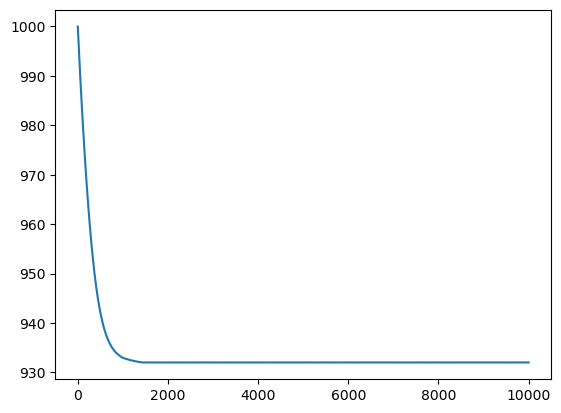

In [144]:
#Change Death Rate
#Will print out value of N every time D0 is changed
#Plots N then La

#The first argument in Lambda is what values of D should be cycled through. The second is how long it should be at that value.
#Here, D is set to 0.02 for 1 iteration, and 0.025 for 10000.
times = [1,10000]
a,b, c = Lambda([0.02,0.022], s, pp, times, dt=0.1)
plt.plot(a)
#Returns N, Lambdas, Derivatives
#2 minutes

1000.0


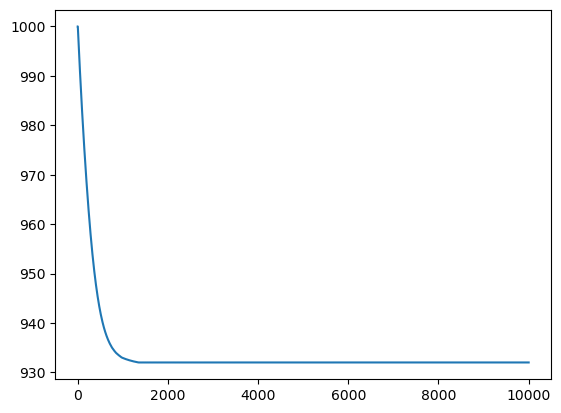

In [145]:
#Change Death Rate
#Will print out value of N every time D0 is changed
#Plots N then La
times = [1,10000]
a_,b_, c_ = BruteForce([0.02,0.022], s, pp, times, dt=0.1)
plt.plot(a_)
#Returns N, Lambdas, Derivatives